<a href="https://colab.research.google.com/github/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/apLecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7: The Fourier Transform
Audio Processing, MED4, Aalborg University, 2019

By Jesper Kjær Nielsen (jkn@create.aau.dk) and Cumhur Erkut (cer@create.aau.dk) Aalborg University.

Last edited: 2020-02-01

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-discrete-time-Fourier-transform-and-its-importance-in-audio-analysis/processing" data-toc-modified-id="The-discrete-time-Fourier-transform-and-its-importance-in-audio-analysis/processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The discrete-time Fourier transform and its importance in audio analysis/processing</a></span><ul class="toc-item"><li><span><a href="#The-discrete-time-Fourier-transform-(DTFT)" data-toc-modified-id="The-discrete-time-Fourier-transform-(DTFT)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The discrete-time Fourier transform (DTFT)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Windowing" data-toc-modified-id="Windowing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Windowing</a></span><ul class="toc-item"><li><span><a href="#The-rectangular-window" data-toc-modified-id="The-rectangular-window-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The rectangular window</a></span></li><li><span><a href="#Windowing-and-its-influence-of-the-DTFT" data-toc-modified-id="Windowing-and-its-influence-of-the-DTFT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Windowing and its influence of the DTFT</a></span></li><li><span><a href="#Bandwidth-and-sidelobes-of-windows" data-toc-modified-id="Bandwidth-and-sidelobes-of-windows-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Bandwidth and sidelobes of windows</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#The-discrete-Fourier-transform-and-Spectrograms" data-toc-modified-id="The-discrete-Fourier-transform-and-Spectrograms-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The discrete Fourier transform and Spectrograms</a></span><ul class="toc-item"><li><span><a href="#The-discrete-Fourier-transform" data-toc-modified-id="The-discrete-Fourier-transform-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The discrete Fourier transform</a></span></li><li><span><a href="#The-short-time-Fourier-transform-(STFT)" data-toc-modified-id="The-short-time-Fourier-transform-(STFT)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The short-time Fourier transform (STFT)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Filtering-using-the-DFT" data-toc-modified-id="Filtering-using-the-DFT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Filtering using the DFT</a></span><ul class="toc-item"><li><span><a href="#Filtering-using-the-DFT:-the-need-for-zero-padding" data-toc-modified-id="Filtering-using-the-DFT:-the-need-for-zero-padding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filtering using the DFT: the need for zero-padding</a></span></li><li><span><a href="#Overlap-and-add" data-toc-modified-id="Overlap-and-add-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Overlap-and-add</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## The discrete-time Fourier transform and its importance in audio analysis/processing
In the next 20 minutes, you will learn
- why it is important to look at signals in the frequency domain
- what the DTFT is
- how you can visualise noise removal in the frequency domain

#### Example: analysing a trumpet signal
Suppose that we record a trumpet signal $s_n$ for $n=0,1,2,\ldots,N-1$.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/trumpet.jpg?raw=1" alt="Trumpet" width="50%"/>
</center>

In [25]:
try:
  import google.colab
  IN_COLAB = True
  !mkdir -p data
  !wget https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lecture7_Fourer_Transfom/data/trumpet.wav -P data
  !wget https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lecture7_Fourer_Transfom/data/trumpetFull.wav -P data
except:
  IN_COLAB = False

# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
import IPython.display as ipd


# 

# load a trumpet signal
samplingFreq, cleanTrumpetSignal = wave.read('data/trumpet.wav')
cleanTrumpetSignal = cleanTrumpetSignal/2**15 # normalise
ipd.Audio(cleanTrumpetSignal, rate=samplingFreq) 

--2021-03-18 21:30:21--  https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lecture7_Fourer_Transfom/data/trumpet.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160044 (156K) [audio/wav]
Saving to: ‘data/trumpet.wav.4’

trumpet.wav.4       100%[===================>] 156.29K  --.-KB/s    in 0.03s   

2021-03-18 21:30:21 (5.40 MB/s) - ‘data/trumpet.wav.4’ saved [160044/160044]

--2021-03-18 21:30:21--  https://raw.githubusercontent.com/SMC-AAU-CPH/med4-ap-jupyter/main/lecture7_Fourer_Transfom/data/trumpetFull.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP 

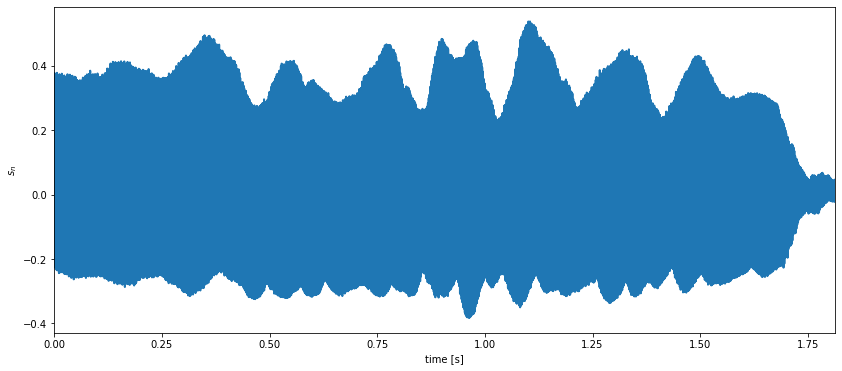

In [26]:
nData = np.size(cleanTrumpetSignal)
timeVector = np.arange(nData)/samplingFreq # seconds
plt.figure(figsize=(14,6))
plt.plot(timeVector,cleanTrumpetSignal,linewidth=2)
plt.xlim((timeVector[0],timeVector[-1]))
plt.xlabel('time [s]'), plt.ylabel('$s_n$');

### The discrete-time Fourier transform (DTFT)
Any colour can be written as a **weighted** combination of three atoms (red, green and blue colours).
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap5LinearCombinationColours.png?raw=1" alt="linear combination of colours" width="80%"/>
</center>

A **signal** (such as the trumpet signal) can be written as a weighted combination of **phasors**, i.e.,
$$
    s_n = \frac{1}{2\pi}\int_{-\pi}^{\pi} S(\omega) \mathrm{e}^{j\omega n}d\omega\ .
$$
This is called the **inverse discrete-time Fourier transform** (inverse DTFT).

We can find the weights $S(\omega)$ by **correlating** our signal to the phasor $\mathrm{e}^{-j\omega n}$, i.e.,
$$
    S(\omega) = \sum_{n=-\infty}^{\infty} s_n \mathrm{e}^{-j\omega n}\ .
$$
This is called **discrete-time Fourier transform** (DTFT).

Note that 
- the DTFT is mostly of **theoretical** interest since we will never encounter infinitely long signals in practice
- the **practical** version of the DTFT is called the **discrete Fourier transform** (DFT) (more on this later)

#### Example: analysing a trumpet signal
Let us now (pretent that we can actually) compute the DTFT of the trumpet signal, i.e.,
$$
    S(\omega) = \sum_{n=-\infty}^{\infty} s_n \mathrm{e}^{-j\omega n}\ .
$$
with $s_n$ being the trumpet signal. (In practice, we are computing the DFT, but we will return to that later).

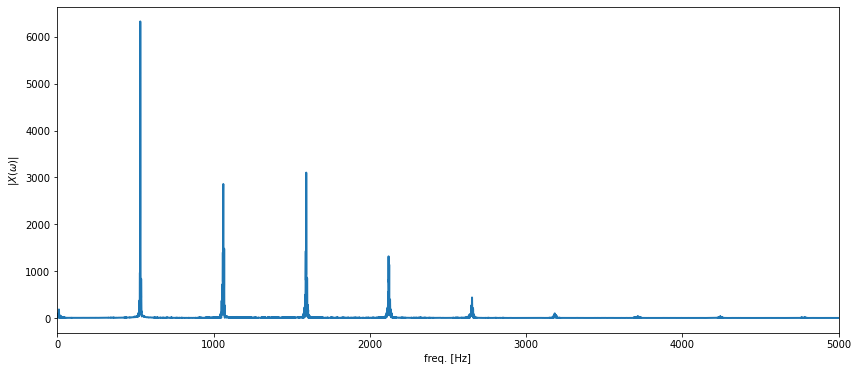

In [27]:
freqVector = np.arange(nData)*samplingFreq/nData # Hz
# we compute the DFT using an FFT algorithm
freqResponseClean = np.fft.fft(cleanTrumpetSignal) 
ampSpectrumClean = np.abs(freqResponseClean)
plt.figure(figsize=(14,6))
plt.plot(freqVector,ampSpectrumClean,linewidth=2)
plt.xlim((0,5000))
plt.xlabel('freq. [Hz]'), plt.ylabel('$|X(\omega)|$');

#### Example: a noisy trumpet signal
Let us now assume that we record a noisy trumpet signal. We can write this as
$$
    x_n = s_n + e_n
$$
where
- $x_n$ is the noisy trumpet signal
- $s_n$ is the clean (i.e., noise-free) trumpet signal
- $e_n$ is the noise

In [28]:
# add noise to the trumpet signal
noise = np.sqrt(0.01)*np.random.randn(nData) # generate so-called white Gaussian noise (WGN)
noisyTrumpetSignal = cleanTrumpetSignal + noise
freqResponseNoisy = np.fft.fft(noisyTrumpetSignal)
ampSpectrumNoisy = np.abs(freqResponseNoisy)
ipd.Audio(noisyTrumpetSignal, rate=samplingFreq) 

In the frequency-domain, the noisy trumpet signal can be written as
\begin{align}
        X(\omega) &= \sum_{n=-\infty}^{\infty} x_n \mathrm{e}^{-j\omega n} = \sum_{n=-\infty}^{\infty} (s_n+e_n) \mathrm{e}^{-j\omega n}\\
        &= \sum_{n=-\infty}^{\infty} s_n \mathrm{e}^{-j\omega n} + \sum_{n=-\infty}^{\infty} e_n \mathrm{e}^{-j\omega n}\\
        &= S(\omega)+E(\omega)
\end{align}
where
- $X(\omega)$ is the DTFT of the noisy trumpet signal
- $S(\omega)$ is the DTFT of the clean trumpet signal
- $E(\omega)$ is the DTFT of the noise

We see that the Fourier transform is **additive**. Thus, if we sum two signals in the time domain, we also sum them in the frequency domain. This is illustrated for the two signals $x_n$ and $y_n$ in the figure below.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7FourierAdditivity.png?raw=1" alt="Additivity of the Fourier transform" width="80%"/>
</center>


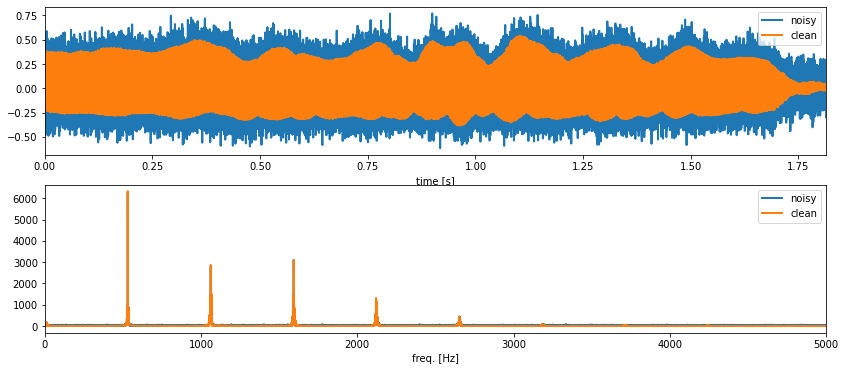

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(timeVector,noisyTrumpetSignal,linewidth=2, label='noisy')
plt.plot(timeVector,cleanTrumpetSignal,linewidth=2, label='clean')
plt.xlim((timeVector[0],timeVector[-1])), plt.xlabel('time [s]'), plt.legend()
plt.subplot(2,1,2)
plt.plot(freqVector,ampSpectrumNoisy,linewidth=2, label='noisy')
plt.plot(freqVector,ampSpectrumClean,linewidth=2, label='clean')
plt.xlim((0,5000)), plt.xlabel('freq. [Hz]'), plt.legend();

#### Example: removing noise from a trumpet signal
Note that
- the trumpet signal only has almost all of its energy concentrated in a few frequencies at (approximately) 530 Hz, 1060 Hz, 1590 Hz, 2120 Hz, 2650 Hz, etc. (These values have been estimated using a pitch estimator which we are going to discuss in lecture 12)
- the noise is spread across all frequencies
- we can remove a lot of noise by using a filter which will only allow the 'trumpet frequencies' to pass through
- a **feedback comb filter** can be designed to do exactly that!

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/comb.jpg?raw=1" alt="Comb" width="70%"/>
</center>

A feedback comb filter has the difference equation
$$
    y_n = x_n + a y_{N-D}\ .
$$

For a sampling frequency of $f_\text{s} = 44,100$ Hz and a pitch of $f_0 = 530 Hz$, the pitch period is
$$
    \frac{f_\text{s}}{f_0} = 83.08\ \text{samples}
$$
Since $D$ has to be an integer, we will set $D=83$ samples in the comb filter.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap5CombFilterStructures.png?raw=1" alt="Comb filter structures" width="80%"/>
</center>

We will now remove the noise in the following way:
1. Filter the noisy trumpet signal $x_n$ through the feedback comb filter given by
$$
    y_n = x_n + a y_{N-D}
$$
with $D=83$ and $a$ close (but not exceeding) 1.
2. The filter output $y_n$ should now be much more similar to the clean trumpet signal $s_n$ since the filter has removed a lot of noise.

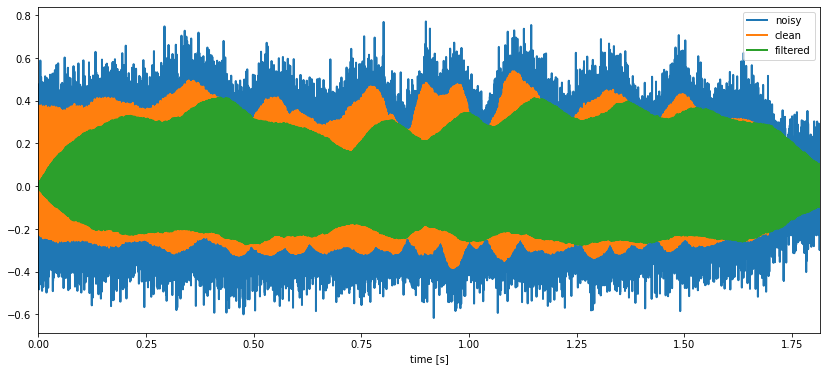

In [30]:
# run a feedback comb filter to filter out the noise
def fbCombFiltering(noisySignal, delay, filterCoef):
    nData = np.size(noisySignal)
    filteredSignal = np.zeros(nData)
    for n in np.arange(nData):
        if n < delay:
            filteredSignal[n] = noisySignal[n]
        else:
            filteredSignal[n] = noisySignal[n]+filterCoef*filteredSignal[n-delay]
    return (1-filterCoef)*filteredSignal

pitchPeriod = 83 # samples (coarse estimate of the pitch period)
filterCoef = 0.98
filteredTrumpetSignal = fbCombFiltering(noisyTrumpetSignal, pitchPeriod, filterCoef)

plt.figure(figsize=(14,6))
plt.plot(timeVector,noisyTrumpetSignal,linewidth=2, label='noisy')
plt.plot(timeVector,cleanTrumpetSignal,linewidth=2, label='clean')
plt.plot(timeVector,filteredTrumpetSignal,linewidth=2, label='filtered')
plt.xlim((timeVector[0],timeVector[-1])), plt.xlabel('time [s]'), plt.legend()

ipd.Audio(filteredTrumpetSignal, rate=samplingFreq) 

#### Example: transfer function and frequency response of the feedback comb filter
In the last lecture, we saw that the **transfer function** of the feedback comb filter is
$$
    H(z) = \frac{1}{1-az^{-D}}\ .
$$

We can easily obtain the **frequency response** as the transfer function on the **unit circle**. That is, we set
$$
    z = \mathrm{e}^{j\omega}
$$
and obtain the **frequency response** of the comb filter to
$$
    H(\omega) = \frac{1}{1-a\mathrm{e}^{-j\omega D}}\ .
$$

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/comb.jpg?raw=1" alt="Comb" width="70%"/>
</center>

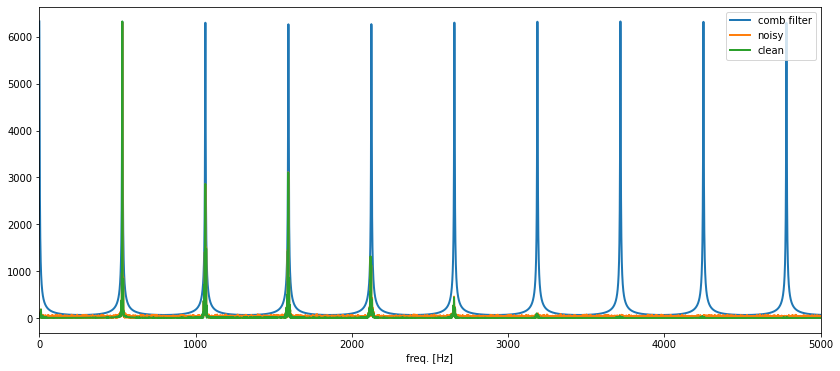

In [31]:
# compute the frequency response of the comb filter and normalise its maximum value
combFilterFreqResp = 1/(1-filterCoef*np.exp(-1j*(2*np.pi*freqVector/samplingFreq)*pitchPeriod))
combFilterFreqResp = (np.max(ampSpectrumClean)*(1-filterCoef))*combFilterFreqResp
plt.figure(figsize=(14,6))
plt.plot(freqVector,np.abs(combFilterFreqResp),linewidth=2, label='comb filter')
plt.plot(freqVector,ampSpectrumNoisy,linewidth=2, label='noisy')
plt.plot(freqVector,ampSpectrumClean,linewidth=2, label='clean')
plt.xlim((0,5000)), plt.xlabel('freq. [Hz]'), plt.legend();

### Summary
1. The **discrete-time Fourier transform** (DTFT) of a signal $x_n$ is given by
$$
    X(\omega) = \sum_{n=-\infty}^{\infty} x_n \mathrm{e}^{-j\omega n}\ .
$$
You can think of the DTFT as a correlation between a signal and a phasor of frequency $\omega$.
2. The **inverse** DTFT of a **frequency response** $X(\omega)$ is given by
$$
    x_n = \frac{1}{2\pi}\int_{-\pi}^{\pi} X(\omega) \mathrm{e}^{j\omega n}d\omega\ .
$$
You can think of the inverse DTFT as writing the signal as a **weighted sum of phasors**.
3. Signals are often much easier to process and analyse in the frequency domain.

### Active 5 minutes break
Recall that an impulse is given by
$$
    \delta_n = \begin{cases}
        1 & n=0\\
        0 & \text{otherwise}
    \end{cases}\ .
$$
1. Compute the **frequency response** of this impulse by computing the DTFT.

Assume that you pass the impulse through a filter (i.e., set $x_n=\delta_n$) with difference equation
$$
    y_n = x_n - x_{n-2}\ .
$$
2. What is the impulse response $h_n$ of this filter?
3. Compute the frequency response of the filter by computing the DTFT of the impulse response.

----
The DTFT of a signal/impulse response $x_n$ is given by
$$
    X(\omega) = \sum_{n=-\infty}^{\infty} x_n \mathrm{e}^{-j\omega n}\ .
$$

## Windowing
In the next 20 minutes, you will learn
- what a window is
- why we need them
- how windows change the frequency response of a signal
- different types of windows

The DTFT of a signal response $x_n$ is given by
$$
    X(\omega) = \sum_{n=-\infty}^{\infty} x_n \mathrm{e}^{-j\omega n}\ .
$$

Note that there are three practical problems with the DTFT
1. we will **never** observe a signal $x_n$ from $-\infty$ to $\infty$
2. the digital frequency $\omega$ is a **continuous** parameter so we cannot store $X(\omega)$ on a computer
3. the frequency content of most signals **change as a function of time**

We solve these problems using
1. **windows** to turn infinite signals into a **finite** number of non-zero samples (this block)
2. sample the DTFT on a uniform grid of frequencies (this is called the **discrete Fourier transform** (DFT)) (next block)
3. slide a **window** across a long signal to compute a **short-time Fourier transform** (STFT) (last block)

### The rectangular window
Let us first look at the rectangular window
$$
    w_n = \begin{cases}
        1 & n=0,1,\ldots, N-1\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7RectWindowSketch.png?raw=1" alt="Sketch of rectangular window" width="80%"/>
</center>

We can think of the rectangular window $w_n$ as a way of **extracting the samples we see** from an infinitely long signal $x_n$, i.e.,
$$
    w_nx_n \quad\text{for } n=-\infty,\ldots,\infty\ .
$$

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7WindowSignalSketch.png?raw=1" alt="Sketch of windowed signal" width="80%"/>
</center>

#### Example: DTFT of a window phasor
Let us look at the phasor
$$
    x_n = \mathrm{e}^{j\omega_0 n}
$$
which we observe for $n=0,1,\ldots,N-1$.

The DTFT of this windowed phasor is (note that subscript $N$ in $X_N(\omega)$ indicates the window length) 
\begin{align}
    X_N(\omega) &= \sum_{n=-\infty}^\infty (w_nx_n) \mathrm{e}^{-j\omega n} = \sum_{n=-\infty}^\infty (w_n\mathrm{e}^{j\omega_0 n}) \mathrm{e}^{-j\omega n}\\
    &= \sum_{n=0}^{N-1} \mathrm{e}^{j\omega_0 n} \mathrm{e}^{-j\omega n} = \sum_{n=0}^{N-1}\mathrm{e}^{-j(\omega-\omega_0) n}\\
    &= \frac{1-\mathrm{e}^{-j(\omega-\omega_0)N}}{1-\mathrm{e}^{-j(\omega-\omega_0)}}
\end{align}
where the last equality follows from the **geometric series**.

In [32]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def computeDtftShiftedRectWindow(windowLength, freqShift):
    '''Compute the DTFT of a modulated rectangular window'''
    nFreqs = 100*windowLength
    freqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs-np.pi
    complexNumber = np.exp(1j*(freqGrid-freqShift))
    numerator = 1-complexNumber**windowLength
    denominator = 1-complexNumber
    dtftShiftedRectWindow = np.zeros(nFreqs,dtype=complex)
    for ii in np.arange(nFreqs):
        if denominator[ii] == 0:
            # Using L'Hospital's rule, it can be shown that the DTFT is N when the dominator is 0
            dtftShiftedRectWindow[ii] = windowLength
        else:
            dtftShiftedRectWindow[ii] = numerator[ii]/denominator[ii]
    return dtftShiftedRectWindow, freqGrid

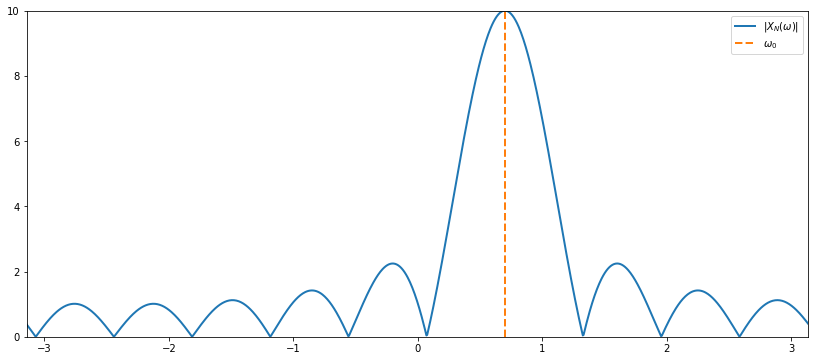

In [33]:
windowLength = 10
signalFreq = 0.7 # rad/sample
windowedDtft, freqGrid = computeDtftShiftedRectWindow(windowLength, signalFreq)
    
plt.figure(figsize=(14,6))
plt.plot(freqGrid,np.abs(windowedDtft), lineWidth=2, label='$|X_N(\omega)|$')
plt.plot(np.array([signalFreq,signalFreq]),np.array([0,windowLength]), '--', lineWidth=2, label='$\omega_0$')
plt.xlim((freqGrid[0], freqGrid[-1])), plt.ylim((0,windowLength)), plt.legend();

The windowed DTFT was
$$
    X_N(\omega) = \frac{1-\mathrm{e}^{-j(\omega-\omega_0)N}}{1-\mathrm{e}^{-j(\omega-\omega_0)}}\ .
$$

Note that
1. if we set $w_0 = 0$, then $x_n=1$ and we obtain the DTFT of only the window, i.e.,
$$
    W_N(\omega) = \frac{1-\mathrm{e}^{-j\omega N}}{1-\mathrm{e}^{-j\omega}}
$$

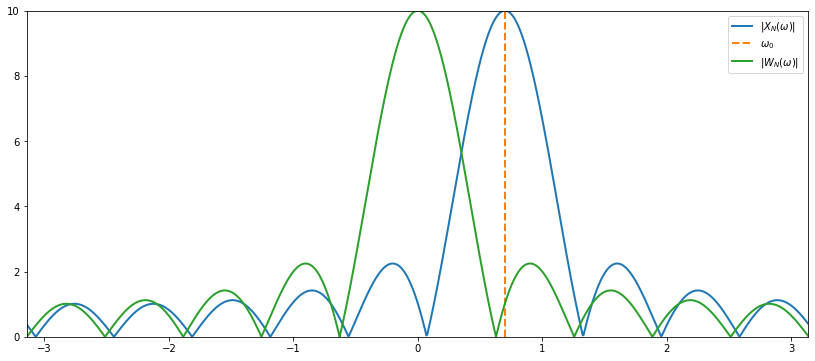

In [34]:
rectWindowDtft,_ = computeDtftShiftedRectWindow(windowLength, 0)

plt.figure(figsize=(14,6))
plt.plot(freqGrid,np.abs(windowedDtft), lineWidth=2, label='$|X_N(\omega)|$')
plt.plot(np.array([signalFreq,signalFreq]),np.array([0,windowLength]), '--', lineWidth=2, label='$\omega_0$')
plt.plot(freqGrid,np.abs(rectWindowDtft), lineWidth=2, label='$|W_N(\omega)|$')
plt.xlim((freqGrid[0], freqGrid[-1])), plt.ylim((0,windowLength)), plt.legend();

2. the DTFT $X_N(\omega)$ of the windowed phasor is simply a frequency shifted version of $W(\omega)$, i.e.,
$$
    X_N(\omega) = W_N(\omega-\omega_0)\ .
$$
This is also called the **modulation property** of the DTFT.

3. if we let $N\to\infty$, it can be shown that
$$
    \lim_{N\to\infty}X_N(\omega) =X(\omega) =  \begin{cases}
        \infty & \omega = \omega_0\\
        0 & \text{otherwise}
    \end{cases}\ .
$$
Thus, the DTFT $X(\omega)$ of a phasor of infinite duration has an infinite peak at $\omega_0$ and is zero otherwise.

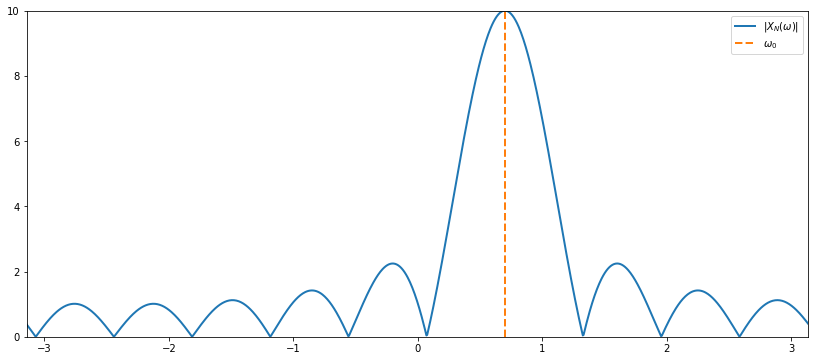

In [35]:
windowLength = 10
windowedDtftN, freqGridN = computeDtftShiftedRectWindow(windowLength, signalFreq)

plt.figure(figsize=(14,6))
plt.plot(freqGridN,np.abs(windowedDtftN), lineWidth=2, label='$|X_N(\omega)|$')
plt.plot(np.array([signalFreq,signalFreq]),np.array([0,windowLength]), '--', lineWidth=2, label='$\omega_0$')
plt.xlim((freqGridN[0], freqGridN[-1])), plt.ylim((0,windowLength)), plt.legend();

### Windowing and its influence of the DTFT
Assume that we observe $N$ samples of a signal $x_n$ with DTFT $X(\omega)$. How is the DTFT $X_N(\omega)$ of the windowed signal related to $X(\omega)$? We know that the windowed DTFT and the inverse DTFT are given by
\begin{align}
    X_N(\omega) &= \sum_{n=-\infty}^\infty w_nx_n\mathrm{e}^{-j\omega n} = \sum_{n=0}^{N-1} x_n\mathrm{e}^{-j\omega n}\\
    x_n &= \frac{1}{2\pi}\int_{-\pi}^\pi X(\tilde{\omega})\mathrm{e}^{j\tilde{\omega} n}d\tilde{\omega}
\end{align}
where we have added a $\tilde{\cdot}$ on top of $\omega$ in the last equation to indicate that it is an integration variable.

Inserting the last equation into the first results in
$$
    X_N(\omega) = \frac{1}{2\pi}\int_{-\pi}^\pi X(\tilde{\omega})\left[\sum_{n=0}^{N-1} \mathrm{e}^{j\tilde{\omega} n}\mathrm{e}^{-j\omega n}\right]d\tilde{\omega} =  \frac{1}{2\pi}\int_{-\pi}^\pi X(\tilde{\omega})W(\omega-\tilde{\omega})d\tilde{\omega}
$$
which is a **convolution** between $X(\omega)$ and the DTFT $W(\omega)$ of the rectangular window.

Note that applying a window is equivalent to **low-pass filtering** the DTFT $X(\omega)$. This causes frequency **smearing**!

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7WindowSmearing.png?raw=1" alt="Frequency smearing of windows" width="80%"/>
</center>

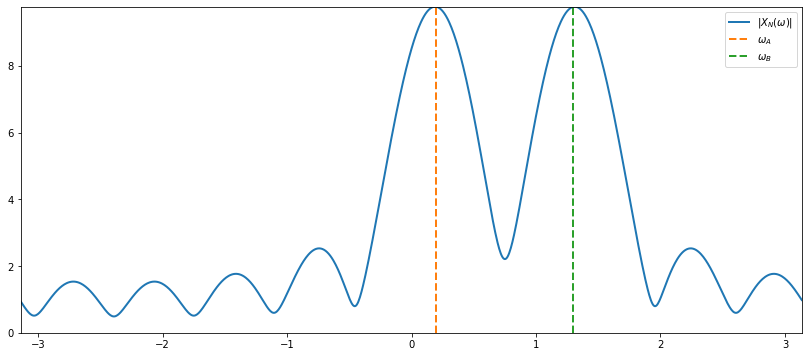

In [36]:
windowLength = 10
signalFreqA = 0.2 # rad/sample
signalFreqB = 1.3 # rad/sample
windowedDtftA, freqGrid = computeDtftShiftedRectWindow(windowLength, signalFreqA)
windowedDtftB, _ = computeDtftShiftedRectWindow(windowLength, signalFreqB)
windowedDtft = windowedDtftA+windowedDtftB

plt.figure(figsize=(14,6))
plt.plot(freqGrid,np.abs(windowedDtft), lineWidth=2, label='$|X_N(\omega)|$')
plt.plot(np.array([signalFreqA,signalFreqA]),np.array([0,np.max(np.abs(windowedDtft))]), '--', lineWidth=2, label='$\omega_A$')
plt.plot(np.array([signalFreqB,signalFreqB]),np.array([0,np.max(np.abs(windowedDtft))]), '--', lineWidth=2, label='$\omega_B$')
plt.xlim((freqGridN[0], freqGridN[-1])), plt.ylim((0,np.max(np.abs(windowedDtft)))), plt.legend();

### Bandwidth and sidelobes of windows
Ideally, we would like a window with
- **narrow bandwidth** to minimise frequency smearing
- **high sidelobe attenuation** to minimise spectal leakage

Unfortunately, decreasing the bandwidth increases the sidelobes and vice versa for a fixed $N$.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7WindowProperties.png?raw=1" alt="Window properties" width="80%"/>
</center>

As no perfect window exists, many windows have been suggested. Note that
- the windows have different trade-offs between bandwidth and sidelobe attenuation
- examples of popular windows are **rectangular**, **sine**, **Hamming**, **Hanning**, **Kaiser**, and **Gaussian**. As an example, the hanning window is given by
$$
    w_n = \begin{cases}
        0.5-0.5\cos(2\pi n/(N-1)) & n = 0, 1, \ldots, N-1\\
        0 & \text{otherwise}\ .
    \end{cases}
$$
- the rectangular window has the smallest bandwidth and the lowest sidelobe attenuation
- increasing the window length $N$ decreases the bandwidth and increases the sidelobe attenuation.

In [37]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

windowLength = 10
samplingIndices = np.arange(windowLength)
rectWindow = np.ones(windowLength)
hanningWindow = np.hanning(windowLength)
hammingWindow = np.hamming(windowLength)

nDft = 1000
freqGrid = 2*np.pi*np.arange(nDft)/nDft-np.pi
dtftRectWindow = np.fft.fftshift(np.fft.fft(rectWindow,nDft))
dtftHanningWindow = np.fft.fftshift(np.fft.fft(hanningWindow,nDft))
dtftHammingWindow = np.fft.fftshift(np.fft.fft(hammingWindow,nDft))

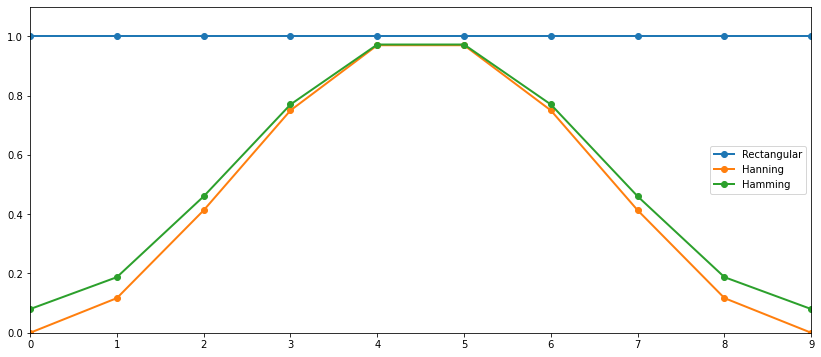

In [38]:
plt.figure(figsize=(14,6))
plt.plot(samplingIndices,rectWindow,'o-',lineWidth=2, label='Rectangular')
plt.plot(samplingIndices,hanningWindow,'o-', lineWidth=2, label='Hanning')
plt.plot(samplingIndices,hammingWindow,'o-', lineWidth=2, label='Hamming')
plt.xlim((samplingIndices[0],samplingIndices[-1])), plt.ylim((0,1.1)), plt.legend();

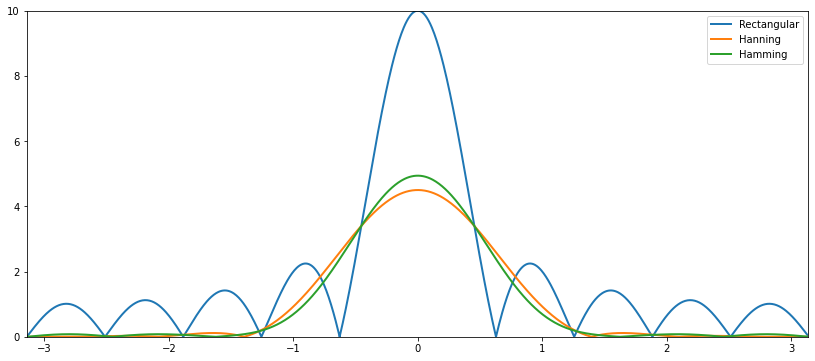

In [39]:
plt.figure(figsize=(14,6))
plt.plot(freqGrid,np.abs(dtftRectWindow), lineWidth=2, label='Rectangular')
plt.plot(freqGrid,np.abs(dtftHanningWindow), lineWidth=2, label='Hanning')
plt.plot(freqGrid,np.abs(dtftHammingWindow), lineWidth=2, label='Hamming')
plt.xlim((freqGrid[0],freqGrid[-1])), plt.ylim((0,windowLength)),plt.legend();

### Summary
1. A window is used to extract a portion of a signal.
2. If we extract the $N$ samples $n=0,1,\ldots,N-1$, the windowed DTFT is
$$
    X_N(\omega) = \sum_{n=-\infty}^{\infty} w_n x_n \mathrm{e}^{-j\omega n} = \sum_{n=0}^{N-1} w_n x_n \mathrm{e}^{-j\omega n}
$$
3. Windowing a signal introduces frequency **smearing** and **leakage**, and these decrease as the window length increases
4. Many differenct windows exist and they trade-off the bandwidth for the sidelobe attenuation in different ways.

## The discrete Fourier transform and Spectrograms
In the next 20 minutes, you will learn
- how the DFT is defined
- how the DFT is related to the DTFT
- what the short-time Fourier transform (STFT) is
- what the spectrogram is

### The discrete Fourier transform
The **discrete Fourier transform** (DFT) is a sampled version of the windowed DTFT, i.e.,
$$
    X_N(\omega_f) = \sum_{n=0}^{N-1} x_n \mathrm{e}^{-j\omega_f n} 
$$
where the digital frequencies are evaluated on a $F$-point grid given by
$$
    \omega_f = 2\pi f/F\qquad\text{for }f=0,1,\ldots,F-1
$$
with $F\geq N$.

---

Note that we have here assumed a rectangular window, but other windows can be used as well.

Often, the expression for $\omega_f$ is inserted directly into the DFT definition and we obtain
$$
    X_N(\omega_f) = \sum_{n=0}^{N-1} x_n \mathrm{e}^{-j2\pi n f/F}\ . 
$$

In [40]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

windowLength = 10
signalFreq = 0.3 # radians/sample
signal = np.cos(signalFreq*np.arange(windowLength))
nFreqsDtft = 2500
freqGridDtft = 2*np.pi*np.arange(nFreqsDtft)/nFreqsDtft-np.pi
windowedDtftSignal = np.fft.fftshift(np.fft.fft(signal,nFreqsDtft))
nFreqsDft = 26
freqGridDft = 2*np.pi*np.arange(nFreqsDft)/nFreqsDft-np.pi
dftSignal = np.fft.fftshift(np.fft.fft(signal,nFreqsDft))

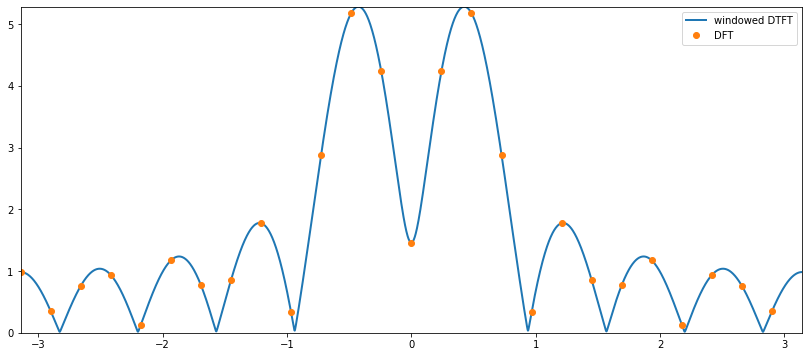

In [41]:
plt.figure(figsize=(14,6))
plt.plot(freqGridDtft,np.abs(windowedDtftSignal), lineWidth=2, label='windowed DTFT');
plt.plot(freqGridDft,np.abs(dftSignal), 'o', lineWidth=2, label='DFT')
plt.xlim((freqGridDtft[0],freqGridDtft[-1])), plt.ylim((0,np.max(np.abs(windowedDtftSignal)))),plt.legend();

#### The inverse DFT
Recall that the inverse DTFT is given by
$$
    x_n = \frac{1}{2\pi}\int_{-\pi}^{\pi} X(\omega) \mathrm{e}^{j\omega n}d\omega\ .
$$

The **inverse DFT** is given by
$$
    x_n = \frac{1}{F}\sum_{f=0}^{F-1} X(\omega_f) \mathrm{e}^{j\omega_f n}
$$
where $\omega_f=2\pi f/F$.

#### The fast Fourier transform
The **fast Fourier transform** (FFT) computes the DFT, but is a computationally efficient way.

Note that
- computing the DFT directly from its definition costs in the order of $F^2$ floating point (flops) operations (we write this as $\mathcal{O}(F^2)$).
- computing the DFT using an FFT algorithm reduces the cost to just $\mathcal{O}(F\log_2 F)$ flops
- most FFT algorithms are working most efficiently when $\log_2(F)$ is an integer
- most FFT algorithms are slow (relatively speaking) if $F$ is prime or has large prime factors (i.e., if you factorise $F$ into a product of prime numbers and any of these are large, then most FFT algorithms will be slow)
- entire books have been written on FFT algorithms, but the most important thing to remember is that they are all just different ways of compute the DFT as fast as possible!

### The short-time Fourier transform (STFT)
In most practical signals, the frequency content changes as a function of time.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7SpectrogramSketch.png?raw=1" alt="Spectrogram sketch" width="70%"/>
</center>

Assume that we have a long signal $x_n$ and a much shorter window $w_n$ of length $N$ which is zero everywhere, except for $n=0,1,...,N-1$.

To analyse the signal, we slide it relative to the window. Mathematically, we can slide the signal by considering
$$
    x_{n+lL}
$$
for different $l$s where
- $l$ is the **frame index**
- $L$ is the **hop size**.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7StftFrameHop.png?raw=1" alt="Frame hop sketch" width="90%"/>
</center>

If we combine this with a window of length $N$, we obtain the **STFT** to
$$
    X_N(\omega_f, l) = \sum_{n=-\infty}^\infty w_n x_{n+lL} \mathrm{e}^{-j\omega_fn} = \sum_{n=0}^{N-1} (w_nx_{n+lL}) \mathrm{e}^{-j\omega_fn}
$$
which can be computed using the **DFT**.

Thus,
- the **STFT** is simply a collection of **DFTs** computed at different positions of the signal
- the samples we see through the window at a given position is called a **frame** or a **segment** and is indexed by the frame index $l$
- unlike the DFT which only depends on the frequency index $f$, the STFT also depends on the frame index $l$

#### The spectrogram
The spectrogram $S_x(\omega_f,l)$ is the **squared amplitude response** of the STFT, i.e.,
$$
    S_\text{x}(\omega_f,l) = |X_N(\omega_f, l)|^2\ .
$$

The spectrogram is used everywhere to visualise the frequency content as a function of time!

In [42]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wave
import IPython.display as ipd

def limitDynamicRange(spectrogram, maxRangeDb):
    minVal = np.max(spectrogram)*10**(-maxRangeDb/10)
    # set all values below minVal to minVal
    spectrogram[spectrogram < minVal] = minVal
    return spectrogram
    
# load a trumpet signal
samplingFreq, trumpetSignal = wave.read('data/trumpetFull.wav')
trumpetSignal = trumpetSignal/2**15 # normalise
ipd.Audio(trumpetSignal, rate=samplingFreq)

In [43]:
frameLength = np.int(np.round(0.05*samplingFreq)) # samples
hopSize = 0.75*frameLength # samples
nDft = 2**13
freqVector, timeVector, specgram = sig.spectrogram(trumpetSignal, \
    fs=samplingFreq, window=np.hanning(frameLength), nperseg=frameLength, noverlap=hopSize, nfft=nDft)
maxDynamicRange = 80 # dB

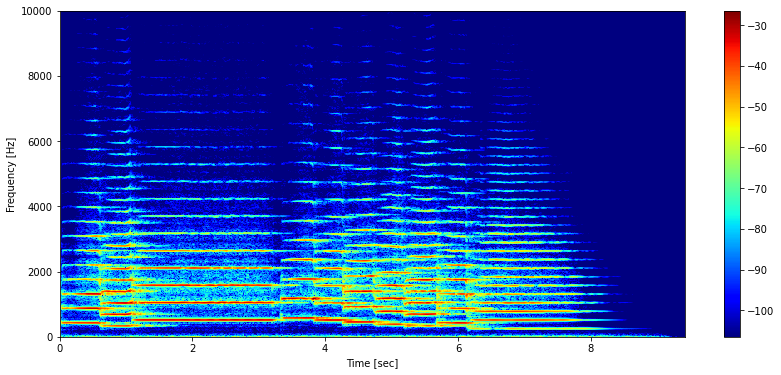

In [44]:
plt.figure(figsize=(14,6))
plt.pcolormesh(timeVector, freqVector, 10*np.log10(limitDynamicRange(specgram, maxDynamicRange)), cmap='jet')
plt.xlabel('Time [sec]'), plt.ylabel('Frequency [Hz]')
plt.colorbar(), plt.xlim((0,timeVector[-1])), plt.ylim((0,10000));
ipd.Audio(trumpetSignal, rate=samplingFreq)

### Summary
1. The **discrete Fourier transform** (DFT) is a sampled version of the **windowed DTFT**, i.e.,
$$
    X_N(\omega_f) = \sum_{n=0}^{N-1} x_n \mathrm{e}^{-j\omega_f n} 
$$
where $\omega_f = 2\pi f/F$ for $f=0,1,\ldots,F-1$ with $F\geq N$.
2. The DFT can be computed efficiently using an **FFT** algorithm.
3. The **short-time Fourier transform** (STFT) is the DFT of different frames of the signal, i.e.,
$$
    X_N(\omega_f, l) = \sum_{n=0}^{N-1} (w_nx_{n+lL}) \mathrm{e}^{-j\omega_fn}
$$
where $l$ is the **frame index** and $L$ the **hop size**.
4. The spectrogram is the **squared amplitude response** of the STFT.

### Active 5 minutes break
Assume we have the two windows
\begin{align}
    w_n &= \delta_n\\
    v_n &= 1\ .
\end{align}
1. Sketch these two windows in the time-domain
2. Find the DTFT of these two windows by table look-up (go to Wikipedia's DTFT page and find the Table of DTFTs) and sketch the amplitude spectra of these DTFTs.
3. What can you say about the time- and frequency resolution of these two windows?

## Filtering using the DFT
In the next 20 minutes, you will learn
- how filtering can be implemented using the DFT
- how the overlap-and-add procedure works for frame-by-frame filtering

### Filtering using the DFT: the need for zero-padding
In the last lecture, we saw that filtering in the Z-domain could be written as multiplication, i.e.,
$$
    Y(z) = H(z)X(z)\ .
$$
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/Xz_Hz_Yz.png?raw=1" alt="Filter block z" width="60%"/>
</center>

Since the DTFT is just a special case of Z-transform for $z=\mathrm{e}^{j\omega}$, we can also express filtering in terms of DTFTs as
$$
    Y(\omega) = H(\omega)X(\omega)\ .
$$

What about **filtering using the DFT** which is what we can implement in practice?

Let us consider the case where we have
- a filter of length $M$ with impulse response $h_n$ for $n=0,1,\ldots, M-1$
- a (rectangularly) windowed input signal $x_n$ which is zero for all other $n$ than for the $N$ samples $n=0,1,\ldots, N-1$

In the time-domain, we can implement this filter as
$$
    y_n = \sum_{m=0}^{M-1} h_m x_{n-m}\ .
$$

---

Note that we always use a rectangular window for implementing filter that does not change between frames.

Let us now try to compute the DFT of $y_n$. We get
\begin{align}
    Y_N(\omega_f) &= \sum_{n=0}^{N-1}y_n\mathrm{e}^{-j\omega_f n} = \sum_{n=0}^{N-1}\left[\sum_{m=0}^{M-1} h_m x_{n-m}\right]\mathrm{e}^{-j\omega_f n}\\
    &= \sum_{m=0}^{M-1} h_m\left[\sum_{n=0}^{N-1} x_{n-m}\mathrm{e}^{-j\omega_f n}\right]
\end{align}

We now fokus on the sum in the bracket. If we set $i=n-m$, we obtain
\begin{align}
    \sum_{n=0}^{N-1} x_{n-m}\mathrm{e}^{-j\omega_f n} &= \sum_{i=-m}^{N-1-m} x_{i}\mathrm{e}^{-j\omega_f (i+m)}\\
    &= \mathrm{e}^{-j\omega_f m}\sum_{i=-m}^{N-1-m} x_{i}\mathrm{e}^{-j\omega_f i}
\end{align}
which nearly looks like the DFT, except for the summation indices.

However, since
- the input signal is zero outside of the window, the lower summation index can be set to 0
- the maximum value of $m$ is $M-1$, the sum will evaluate to the same complex number for $m=0,1,\ldots,M-1$ if **we extend the input signal with $M-1$ zeros**! That is, we create a **zero-padded** input signal $\tilde{x}_n$ of length $F=N+M-1$ given by
$$
    \tilde{x}_n = \begin{cases}
        x_n & n=0,1,\ldots,N-1\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

Thus, we get that
$$
    \sum_{n=0}^{N-1} x_{n-m}\mathrm{e}^{-j\omega_f n} = \mathrm{e}^{-j\omega_f m}\sum_{i=0}^{F-1} \tilde{x}_{i}\mathrm{e}^{-j\omega_f i} =  \mathrm{e}^{-j\omega_f m}X_N(\omega_f)
$$
where $X_N(\omega_f)$ is the $F=N+M-1$-point DFT of the windowed input signal $x_n$ **padded** with $M-1$ **zeros**.

Note that this property of the DFT is also called the **time-shift** property.

For the output signal, we know get
\begin{align}
    Y_N(\omega_f) &= \sum_{m=0}^{M-1} h_m\left[\sum_{n=0}^{N-1} x_{n-m}\mathrm{e}^{-j\omega_f n}\right] = \left[\sum_{m=0}^{M-1} h_m \mathrm{e}^{-j\omega_f m}\right]X_N(\omega_k)\\
    &= H(\omega_f)X_N(\omega_f)
\end{align}
where $H(\omega_f)$ is the $F=N+M-1$-point DFT of the filter's impulse response. Thus, the impulse response is also **zero-padded** (with $N-1$ zeros)!

We can now finally compute the filter output using an inverse DFT as
$$
    y_n = \frac{1}{F}\sum_{f=0}^{F-1} Y_N(\omega_f) \mathrm{e}^{j\omega_f n}\ .
$$

Note that
- we will get $F=N+M-1$ output samples, even though we only used $N$ input samples
- the last $M-1$ output samples are **not** zero
- when we do **block-based filtering**, we have to **overlap-and-add** the right output samples of successive blocks (see the book for details).

### Overlap-and-add
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/ap7OverlapAddIllustration.png?raw=1" alt="Overlap-and-add sketch" width="70%"/>
</center>

### Summary
1. Traditional filtering can be implemented using the DFT and overlap-and-add
2. For long filters and/or signals, this can be significantly faster than implementing the filtering directly in the time-domain.
3. Only works for a filter with a **finite impulse response**
4. Rectangular windows with no overlap should be used to extract frames from the input signal.